In [3]:
!pip install pgmpy

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import pandas as pd
from pgmpy.estimators import PC, HillClimbSearch,MmhcEstimator
from pgmpy.estimators.CITests import chi_square
import networkx as nx
from pgmpy.estimators import BicScore ,K2Score, MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.models import BayesianNetwork
import numpy as np
from pgmpy.inference import VariableElimination
from pgmpy.base import DAG
from pgmpy.metrics import correlation_score

In [6]:
df = pd.read_csv("data/cleaning_dataset.csv")

# PC Algorithm

 Estimates a DAG/PDAG from the given dataset using the PC algorithm which
        is a constraint-based structure learning algorithm. The independencies
        in the dataset are identified by doing statistical independece test. This
        method returns a DAG/PDAG structure which is faithful to the independencies
        implied by the dataset.
The statistical tests use this value to compare with the p-value of the test to decide whether the tested variables are independent or not<br>
Types of test:
<ul>
<li> "chi_square": Uses the Chi-Square independence test. This works only for discrete datasets.
<li>"pearsonr": Uses the pertial correlation based on pearson correlation coefficient to test independence. This works only for continuous datasets.
</ul>

## Correlation Matrix chi square

In [7]:
cols = df.columns
p_values = np.zeros((len(cols), len(cols)))
for first_index, first_col_val in enumerate(cols): 
    for second_index, second_col_val in enumerate(cols):
        if first_index != second_index:
            (chi, p_value, dof) = chi_square(first_col_val, second_col_val, [], df, False)
            p_values[first_index, second_index] = p_value

display(pd.DataFrame(p_values, columns=cols, index=cols).apply(np.log))

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance
Age,-inf,-22.740696,-1.039148,-2.791456,-51.975803,-209.963969,-0.072464,-6.107392,-122.459167,-1.295151,-0.257330,-355.619684,-0.065379
Attrition,-22.740696,-inf,-12.091207,-4.223994,-0.606006,-34.237255,-7.494202,-23.081838,-27.270011,-46.255236,-0.009975,-40.851214,-6.935569
BusinessTravel,-1.039148,-12.091207,-inf,-0.577524,-0.532532,-0.966097,-0.661752,-2.192671,-2.205608,-1.426898,-0.531619,-0.129714,-0.069215
DistanceFromHome,-2.791456,-4.223994,-0.577524,-inf,-0.086128,-1.639176,-0.136519,-1.157242,-0.807594,-1.582876,-2.709210,-1.675896,-0.064895
Education,-51.975803,-0.606006,-0.532532,-0.086128,-inf,-16.288140,-1.002704,-0.482621,-16.434348,-0.903363,-0.438111,-17.477097,-0.166011
JobLevel,-209.963969,-34.237255,-0.966097,-1.639176,-16.288140,-inf,-0.062962,-3.386753,-inf,-0.059707,-0.089660,-681.598728,-0.278890
JobSatisfaction,-0.072464,-7.494202,-0.661752,-0.136519,-1.002704,-0.062962,-inf,-0.188194,-0.246965,-1.213438,-1.347376,-0.295545,-0.384024
MaritalStatus,-6.107392,-23.081838,-2.192671,-1.157242,-0.482621,-3.386753,-0.188194,-inf,-2.197425,-0.408361,-0.097899,-5.526637,-0.620408
MonthlyIncome,-122.459167,-27.270011,-2.205608,-0.807594,-16.434348,-inf,-0.246965,-2.197425,-inf,-0.023468,-0.883640,-373.938535,-1.235510
OverTime,-1.295151,-46.255236,-1.426898,-1.582876,-0.903363,-0.059707,-1.213438,-0.408361,-0.023468,-inf,-0.072064,-1.257106,-0.699757


In [8]:
orderd_list = ['Age','Education','MaritalStatus','DistanceFromHome','WorkLifeBalance','TotalWorkingYears','JobLevel',
                'BusinessTravel','OverTime','PerformanceRating','JobSatisfaction','MonthlyIncome','Attrition']

Working for n conditional variables: 4: 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]
C:\Users\lcass\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pgmpy\base\DAG.py:1195: UserWarning: PDAG has no faithful extension (= no oriented DAG with the same v-structures as PDAG). Remaining undirected PDAG edges oriented arbitrarily.
  warn(


DAG with 8 nodes and 7 edges


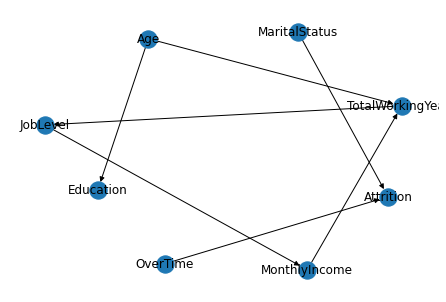

In [9]:
pcest = PC(df)
pcmodel = pcest.estimate(variant = 'stable',max_cond_vars=4, significance_level=0.05)
print(pcmodel)
nx.draw(pcmodel, with_labels=True)

# Hill Climbing
Performs local hill climb search to estimates the DAG structure that has optimal score, according to the scoring method supplied.

## HILL CLIMBING BAYESIAN NETWORK USING BIC SCORE

  0%|          | 8/1000000 [00:01<46:32:43,  5.97it/s] 


-16957.62954195102
[('Age', 'Education'), ('Attrition', 'OverTime'), ('Attrition', 'MaritalStatus'), ('Attrition', 'BusinessTravel'), ('JobLevel', 'TotalWorkingYears'), ('JobLevel', 'Attrition'), ('MonthlyIncome', 'JobLevel'), ('TotalWorkingYears', 'Age')]


0.8041237113402062

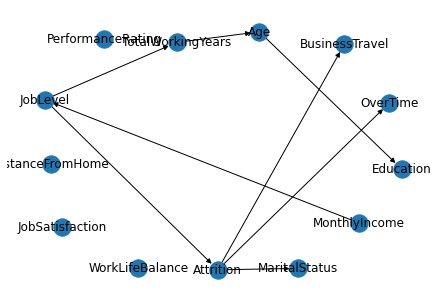

In [10]:
est = HillClimbSearch(df)
HC_first = est.estimate(scoring_method=BicScore(df))
nx.draw(HC_first, with_labels=True)
print(BicScore(df).score(HC_first))
print((HC_first.edges()))
correlation_score(HC_first, df, test="chi_square", significance_level=0.05)

# Bayesian network using K2Score

The K2 score is the result of setting all Dirichlet hyperparameters/pseudo_counts to 1.
The `score`-method measures how well a model is able to describe the given data set.

  0%|          | 10/1000000 [00:01<38:37:38,  7.19it/s]


-16919.66087345071
10
[('Age', 'Education'), ('Attrition', 'OverTime'), ('Attrition', 'TotalWorkingYears'), ('Attrition', 'MaritalStatus'), ('Attrition', 'BusinessTravel'), ('Attrition', 'JobSatisfaction'), ('Attrition', 'WorkLifeBalance'), ('JobLevel', 'MonthlyIncome'), ('TotalWorkingYears', 'JobLevel'), ('TotalWorkingYears', 'Age')]


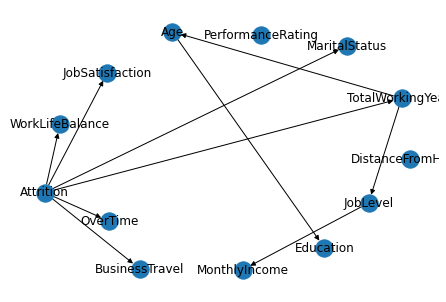

In [11]:
est = HillClimbSearch(df)
HC_firstK2 = est.estimate(scoring_method=K2Score(df))
nx.draw(HC_firstK2, with_labels=True)
print(K2Score(df).score(HC_firstK2))
print(len(HC_firstK2.edges()))
print(HC_firstK2.edges)

Ho aggiunto archi significativi cioè archi di cui i precedenti modelli non riescono ad estrarre informazioni
Per esempio ho aggiunto archi che danno informazioni ai nodi che non hanno archi come: PerformanceRating,DistanceFromHome....

In [12]:
edges = [("DistanceFromHome","WorkLifeBalance"),
         ("DistanceFromHome","JobSatisfaction"),
         ("WorkLifeBalance","JobSatisfaction"),
         ("WorkLifeBalance","PerformanceRating"),
         ("MaritalStatus","WorkLifeBalance"),
         ("PerformanceRating","MonthlyIncome"),
         ("PerformanceRating","JobSatisfaction"),
         ("OverTime","Attrition"),
         ("BusinessTravel","WorkLifeBalance"),
        ]
print(len(edges))

9


## Using fixed edges, Hill Climbing Bic Score

  0%|          | 5/1000000 [00:01<61:04:48,  4.55it/s] 


{('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Age'), ('Age', 'Education'), ('MonthlyIncome', 'JobLevel'), ('JobLevel', 'TotalWorkingYears')}


0.4057971014492754

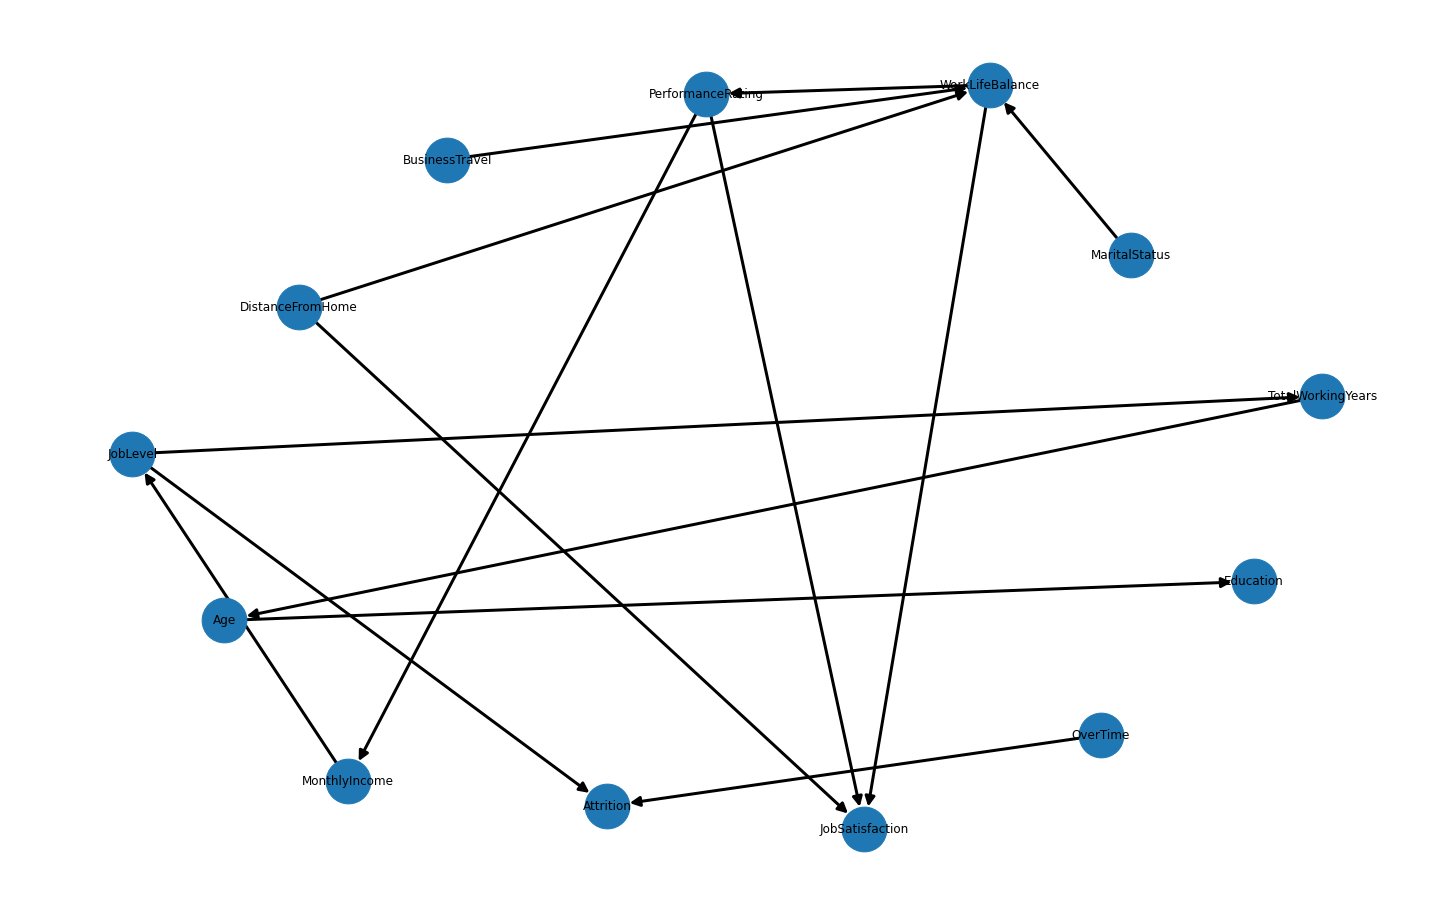

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12.5))
est = HillClimbSearch(df)
model_fixed_edges = est.estimate(scoring_method=BicScore(df),fixed_edges= edges)
nx.draw(model_fixed_edges, with_labels=True,node_size=2000, width=3, arrowsize=20)
print((model_fixed_edges.edges())-edges)
correlation_score(model_fixed_edges, df, test="chi_square", significance_level=0.05)

## Using fixed edges, Hill Climbing K2 Score

  0%|          | 6/1000000 [00:01<57:47:28,  4.81it/s] 


{('JobLevel', 'Attrition'), ('TotalWorkingYears', 'Age'), ('MonthlyIncome', 'TotalWorkingYears'), ('Age', 'Education'), ('MonthlyIncome', 'JobLevel'), ('JobLevel', 'TotalWorkingYears')}


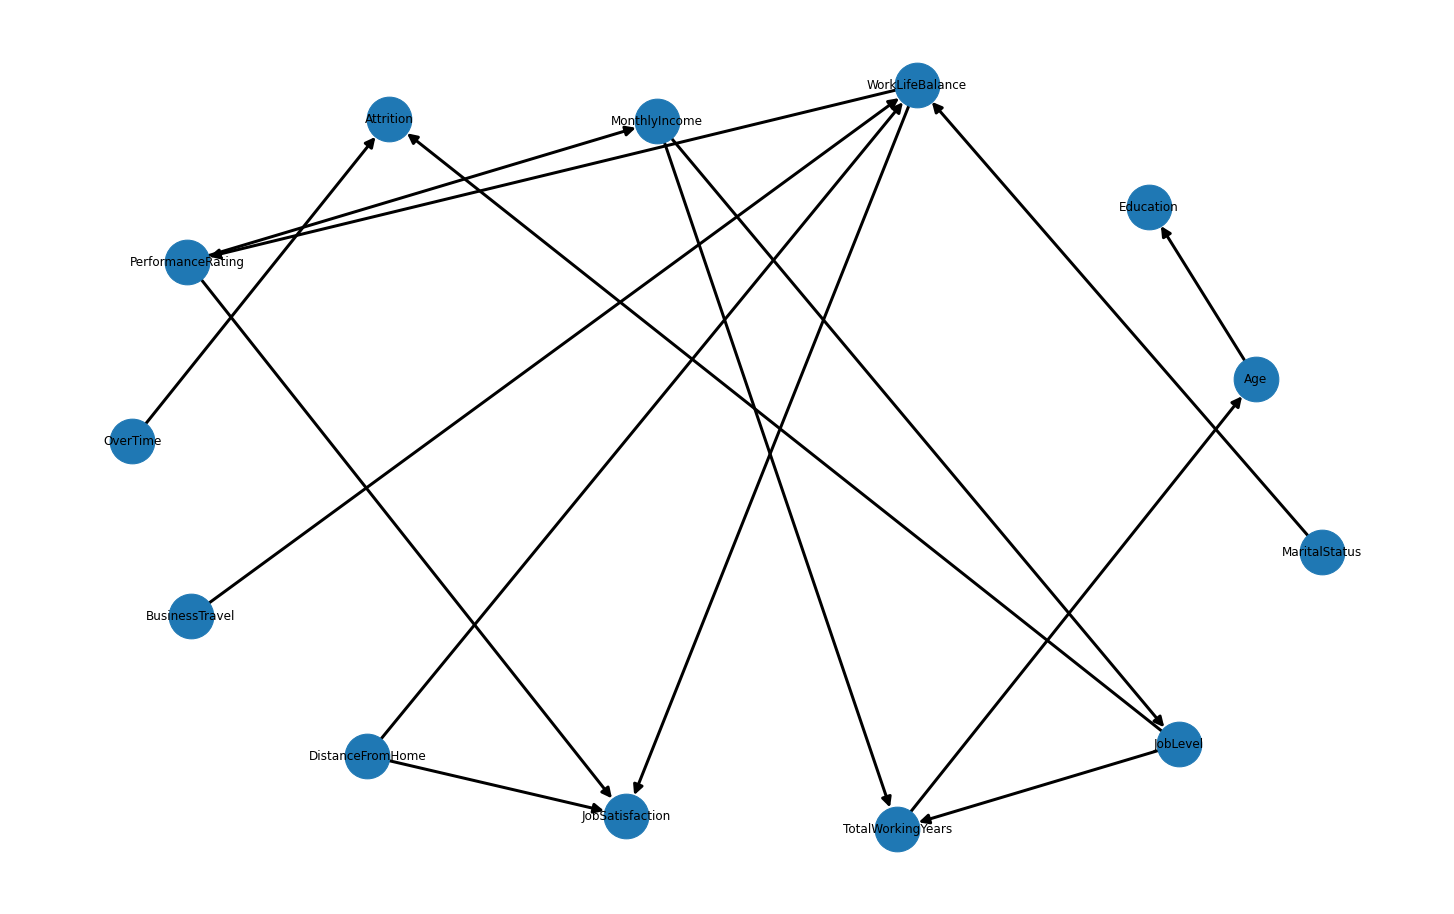

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12.5))
est = HillClimbSearch(df)
model_fixed_edges_K2 = est.estimate(scoring_method=K2Score(df),fixed_edges= edges)
nx.draw(model_fixed_edges_K2, with_labels=True,node_size=2000, width=3, arrowsize=20)
print((model_fixed_edges_K2.edges())-edges)
#correlation_score(model_fixed_edges_K2, df, test="K2", significance_level=0.05)

## Using Ordered List to improve final Result

In [15]:
# Using black list
black_list = []
for i in range(0,len(orderd_list)):
    for j in range(0,i):
        black_list.append((orderd_list[i],orderd_list[j]))

#print(black_list)

  0%|          | 5/1000000 [00:00<37:04:02,  7.49it/s] 


{('Age', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('JobLevel', 'Attrition'), ('JobLevel', 'MonthlyIncome'), ('Age', 'Education')}


0.7272727272727274

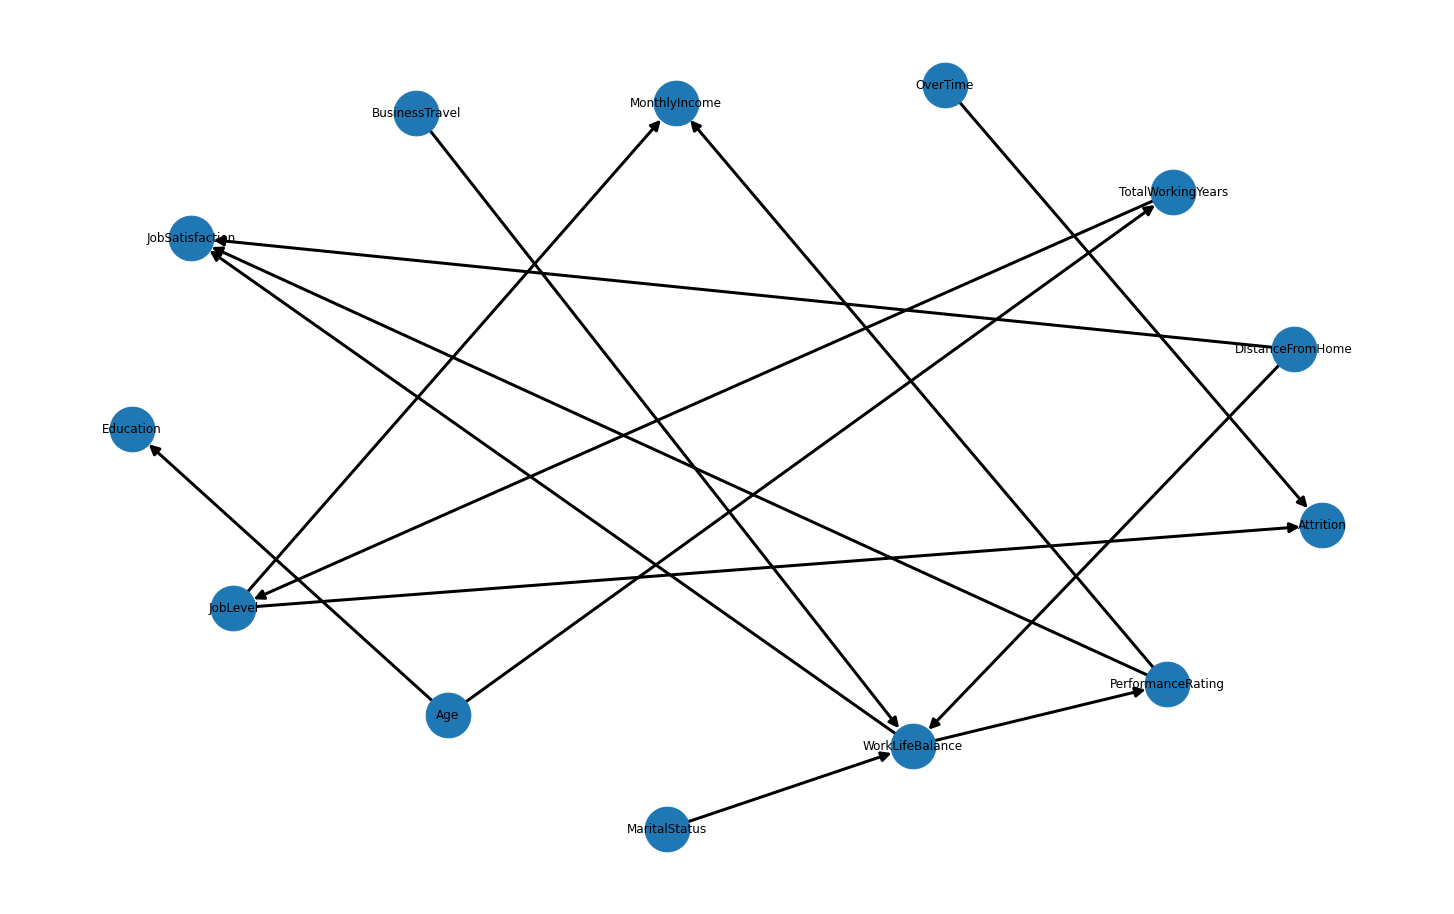

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12.5))
last_model_bic = HillClimbSearch(df)
last_model_bic = est.estimate(scoring_method=BicScore(df),fixed_edges=edges, black_list=black_list)
nx.draw(last_model_bic, with_labels=True,node_size=2000, width=3, arrowsize=20)
print((last_model_bic.edges())-edges)
correlation_score(last_model_bic, df, test="chi_square", significance_level=0.05)

  0%|          | 5/1000000 [00:00<41:16:38,  6.73it/s] 


{('Age', 'TotalWorkingYears'), ('TotalWorkingYears', 'JobLevel'), ('JobLevel', 'Attrition'), ('JobLevel', 'MonthlyIncome'), ('Age', 'Education')}


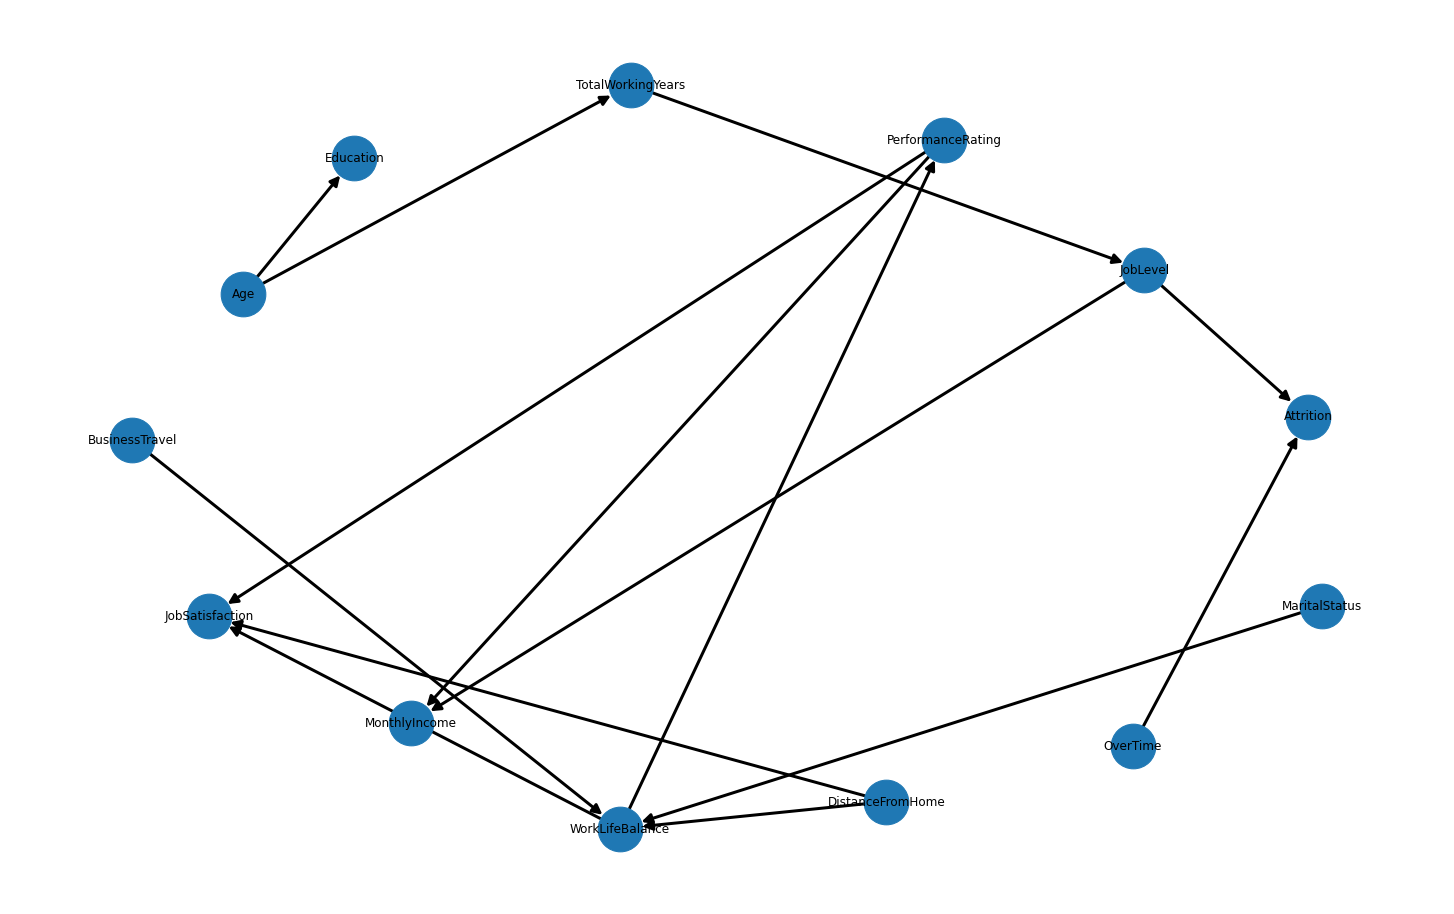

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12.5))
est = HillClimbSearch(df)
last_model_K2 = est.estimate(scoring_method=K2Score(df),fixed_edges=edges, black_list=black_list)
nx.draw(last_model_K2, with_labels=True,node_size=2000, width=3, arrowsize=20)
print((last_model_K2.edges())-edges)

Si può notare che nell'uso del Bic e del K2 ci sono differenze solamente nei primi modelli, nel momento in cui si usano i fixed age e black list i modelli costruiti rimangono uguali
Utilizziamo il modello migliore e costruiamo le cpd andando ad usare differenti stimatori per "fittare i dati" (calcolare le prior probabilities)

# CPD's and Inference



### Likelihood

In [18]:
bn_likelihood = BayesianNetwork(last_model_bic.edges())
bn_likelihood.fit(df, estimator=MaximumLikelihoodEstimator)
cpds = bn_likelihood.get_cpds()
for cpd in cpds:
    print(cpd)

+-----------------+----------+
| Age(Middle-age) | 0.423129 |
+-----------------+----------+
| Age(Senior)     | 0.355102 |
+-----------------+----------+
| Age(Young)      | 0.221769 |
+-----------------+----------+
+-------------------------------+-----+---------------------+
| Age                           | ... | Age(Young)          |
+-------------------------------+-----+---------------------+
| TotalWorkingYears(Beginner)   | ... | 0.4723926380368098  |
+-------------------------------+-----+---------------------+
| TotalWorkingYears(Competent)  | ... | 0.27300613496932513 |
+-------------------------------+-----+---------------------+
| TotalWorkingYears(Expert)     | ... | 0.0                 |
+-------------------------------+-----+---------------------+
| TotalWorkingYears(Novice)     | ... | 0.254601226993865   |
+-------------------------------+-----+---------------------+
| TotalWorkingYears(Proficient) | ... | 0.0                 |
+-------------------------------+-----+

### Bayesian Estimator

In [19]:
bn_bayesian = BayesianNetwork(last_model_bic.edges())
bn_bayesian.fit(df, estimator=BayesianEstimator)
cpds = bn_bayesian.get_cpds()
for cpd in cpds:
    print(cpd)

+-----------------+----------+
| Age(Middle-age) | 0.422825 |
+-----------------+----------+
| Age(Senior)     | 0.355028 |
+-----------------+----------+
| Age(Young)      | 0.222147 |
+-----------------+----------+
+-------------------------------+-----+----------------------+
| Age                           | ... | Age(Young)           |
+-------------------------------+-----+----------------------+
| TotalWorkingYears(Beginner)   | ... | 0.47100712105798576  |
+-------------------------------+-----+----------------------+
| TotalWorkingYears(Competent)  | ... | 0.2726347914547304   |
+-------------------------------+-----+----------------------+
| TotalWorkingYears(Expert)     | ... | 0.001017293997965412 |
+-------------------------------+-----+----------------------+
| TotalWorkingYears(Novice)     | ... | 0.25432349949135297  |
+-------------------------------+-----+----------------------+
| TotalWorkingYears(Proficient) | ... | 0.001017293997965412 |
+--------------------------

# DIPENDENT AND INDIPENDENT r.v. ON CHI SQUARE TEST

In [20]:
col_names = df.columns 

display(pd.DataFrame(p_values, columns=col_names, index=col_names)>0.01)
corr = pd.DataFrame(p_values, columns=col_names, index=col_names)
#True = Indipendent
dip = []
indip = []
for i in range(len(orderd_list)):
    c = orderd_list[i]
    for j in range(i+1, len(orderd_list)):
        r = orderd_list[j]    
        if corr[c][r]<0.01:
            dip.append(c + ' -> ' + r)
        else:
            indip.append(c + ' ⫫ ' + r)

print('Dipendent variables \n',*dip,sep='\n')
print('\n\nIndipendent variables \n',*indip,sep='\n')
        



,Age,Attrition,BusinessTravel,DistanceFromHome,Education,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PerformanceRating,TotalWorkingYears,WorkLifeBalance
Age,False,False,True,True,False,False,True,False,False,True,True,False,True
Attrition,False,False,False,True,True,False,False,False,False,False,True,False,False
BusinessTravel,True,False,False,True,True,True,True,True,True,True,True,True,True
DistanceFromHome,True,True,True,False,True,True,True,True,True,True,True,True,True
Education,False,True,True,True,False,False,True,True,False,True,True,False,True
JobLevel,False,False,True,True,False,False,True,True,False,True,True,False,True
JobSatisfaction,True,False,True,True,True,True,False,True,True,True,True,True,True
MaritalStatus,False,False,True,True,True,True,True,False,True,True,True,False,True
MonthlyIncome,False,False,True,True,False,False,True,True,False,True,True,False,True
OverTime,True,False,True,True,True,True,True,True,True,False,True,True,True


Dipendent variables 

Age -> Education
Age -> MaritalStatus
Age -> TotalWorkingYears
Age -> JobLevel
Age -> MonthlyIncome
Age -> Attrition
Education -> TotalWorkingYears
Education -> JobLevel
Education -> MonthlyIncome
MaritalStatus -> TotalWorkingYears
MaritalStatus -> Attrition
WorkLifeBalance -> Attrition
TotalWorkingYears -> JobLevel
TotalWorkingYears -> MonthlyIncome
TotalWorkingYears -> Attrition
JobLevel -> MonthlyIncome
JobLevel -> Attrition
BusinessTravel -> Attrition
OverTime -> Attrition
JobSatisfaction -> Attrition
MonthlyIncome -> Attrition


Indipendent variables 

Age ⫫ DistanceFromHome
Age ⫫ WorkLifeBalance
Age ⫫ BusinessTravel
Age ⫫ OverTime
Age ⫫ PerformanceRating
Age ⫫ JobSatisfaction
Education ⫫ MaritalStatus
Education ⫫ DistanceFromHome
Education ⫫ WorkLifeBalance
Education ⫫ BusinessTravel
Education ⫫ OverTime
Education ⫫ PerformanceRating
Education ⫫ JobSatisfaction
Education ⫫ Attrition
MaritalStatus ⫫ DistanceFromHome
MaritalStatus ⫫ WorkLifeBalance
MaritalStat

## Conditional Indipendece based on Chi Square

In [21]:
ris = chi_square(X='Age', Y='JobLevel', Z=['TotalWorkingYears'], data=df, boolean=True, significance_level=0.01)
print('P(Age ⫫ JobeLevel|TotalWorkingYears)',ris)

ris = chi_square(X='Age', Y='MonthlyIncome', Z=['Attrition'], data=df, boolean=True, significance_level=0.01)
print('P(Age ⫫ MonthlyIncome|Attrition)',ris)


ris = chi_square(X='MaritalStatus', Y='MonthlyIncome', Z=['OverTime'], data=df, boolean=True, significance_level=0.01)
print('P(MaritalStatus ⫫ MonthlyIncome|OverTime)',ris) # Different Result from  expected 


ris = chi_square(X='MonthlyIncome', Y='Education', Z=['JobSatisfaction'], data=df, boolean=True, significance_level=0.01)
print('P(MonthlyIncome ⫫ Education|JobSatisfaction)',ris) # Different Result from  expected 

ris = chi_square(X='Age', Y='MonthlyIncome', Z=['TotalWorkingYears','Attrition'], data=df, boolean=True, significance_level=0.01)
print('P(Age ⫫ MonthlyIncome|TotalWorkingYears,Attrition)',ris)

P(Age ⫫ JobeLevel|TotalWorkingYears) True
P(Age ⫫ MonthlyIncome|Attrition) False
P(MaritalStatus ⫫ MonthlyIncome|OverTime) True
P(MonthlyIncome ⫫ Education|JobSatisfaction) False
P(Age ⫫ MonthlyIncome|TotalWorkingYears,Attrition) True


## Using last Network to find Active Trail and Conditional Indipendence

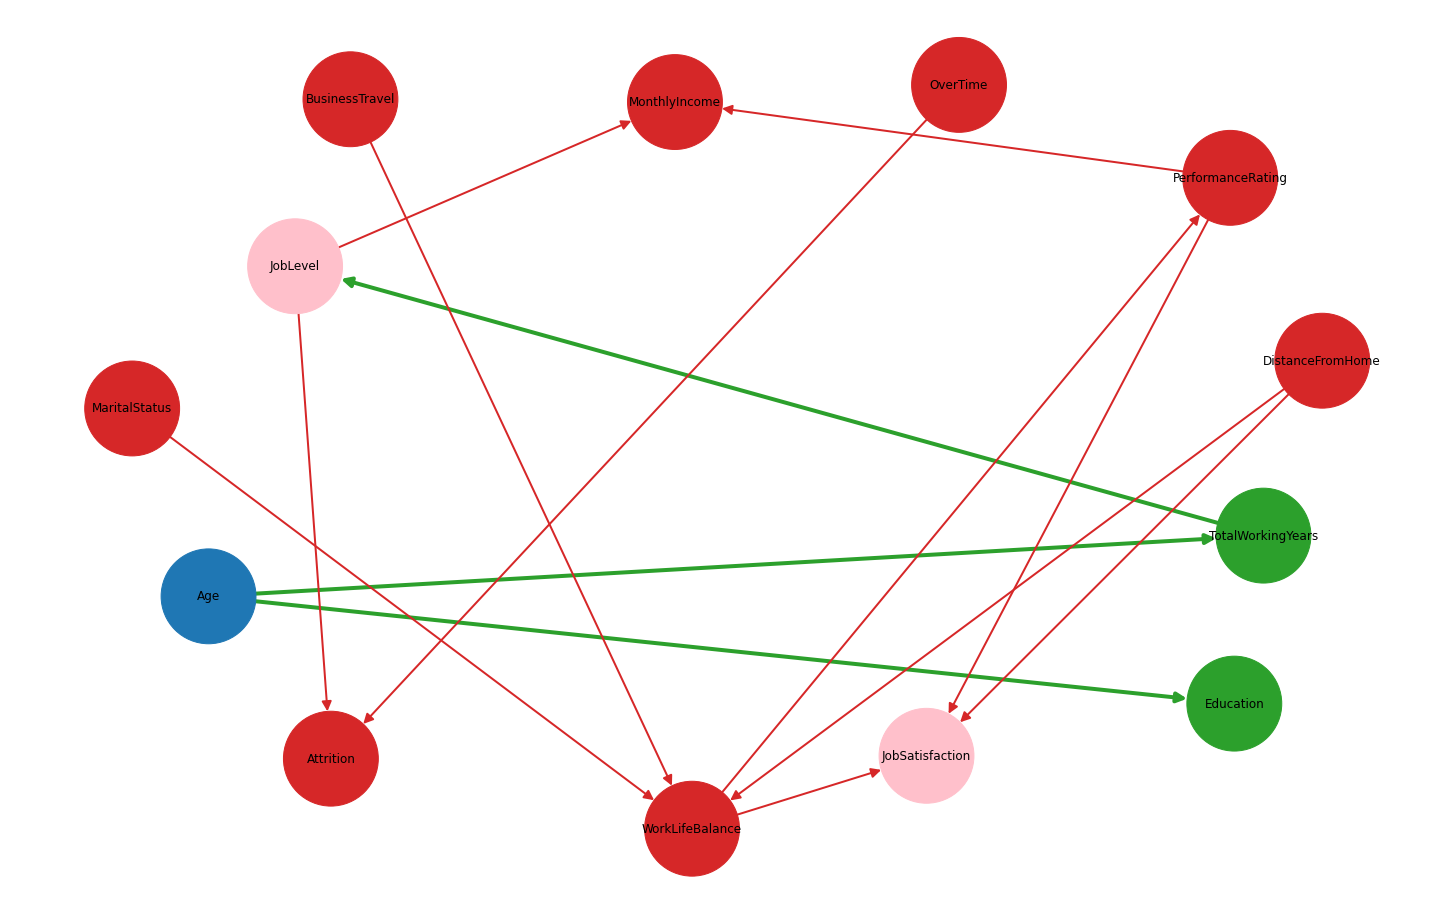

In [33]:
def display_active_trails(net, target_node, given_nodes=[]):
    # Taking all nodes with active trails from target_node with given_nodes as evidence
    active_trail = net.active_trail_nodes(target_node, given_nodes)[target_node]

    # I give a color to all nodes, blue if target, pink if evidence, green if in trails active, red otherwise
    nodes_colors = []
    for node in net.nodes():
        if node == target_node:
            nodes_colors.append("tab:blue")
        elif node in given_nodes:
            nodes_colors.append("pink")
        elif node in active_trail:
            nodes_colors.append("tab:green")
        else:
            nodes_colors.append("tab:red")

    # Same with edges, green if I have an active trail, red otherwise
    edges_colors = []
    edges_weights = []
    for (u, v) in net.edges:
        if u in active_trail and (v in active_trail or v in given_nodes):
            edges_colors.append("tab:green")
            edges_weights.append(4)
        elif u in given_nodes and v == target_node:
            edges_colors.append("tab:green")
            edges_weights.append(4)
        else:
            edges_colors.append("tab:red")
            edges_weights.append(2)

    # Finally I plot the network with colors
    plt.figure(figsize=(20,12.5))
    nx.draw(net, width=edges_weights,
            node_color=nodes_colors, edge_color=edges_colors,
            with_labels=True, node_size=9000, arrowsize=20)

# Da vedere dopo
display_active_trails(bn_likelihood, 'Age', given_nodes=['JobLevel','JobSatisfaction'])

In [23]:
def draw_indipendence(net,first_node,second_node,evidence = []):
    ancenstors = []
    for ev in evidence:
        ancenstors.append(net._get_ancestors_of(ev))
    
    ancestors = set().union(*ancenstors)
    nodes_colors = []
    for node in net.nodes():
        if node == first_node or node == second_node:
            nodes_colors.append("blue")
        elif node in evidence:
            nodes_colors.append("red")
        elif node in ancestors:
            nodes_colors.append("yellow")
        else:
            nodes_colors.append("green")
    plt.figure(figsize=(20,12.5))
    nx.draw(net,
            node_color=nodes_colors,
            with_labels=True, node_size=9000, arrowsize=20)


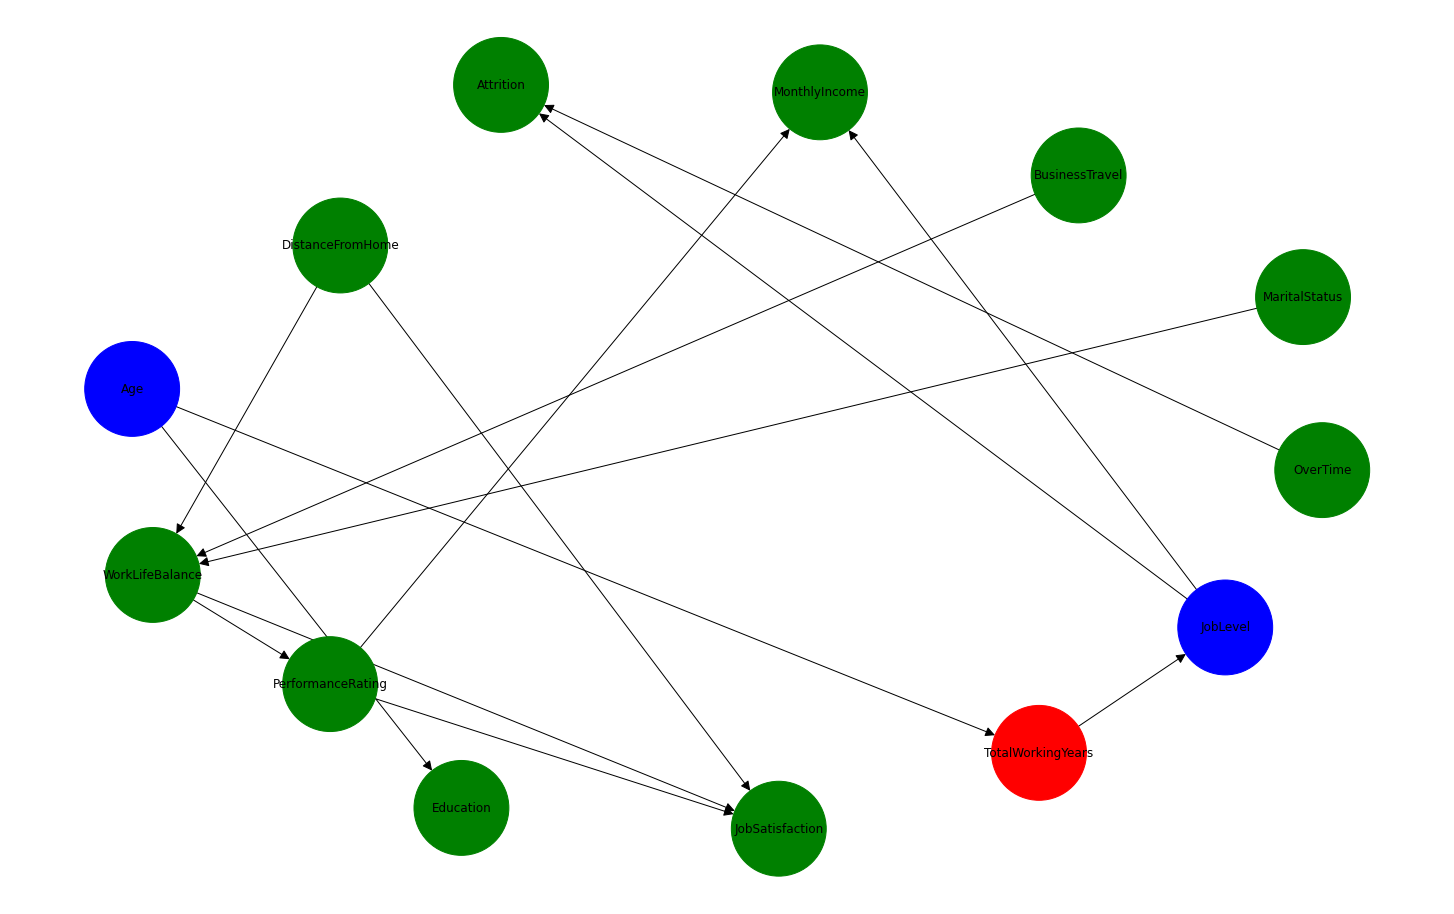

In [24]:
draw_indipendence(bn_likelihood,'Age','JobLevel',evidence = ['TotalWorkingYears'])

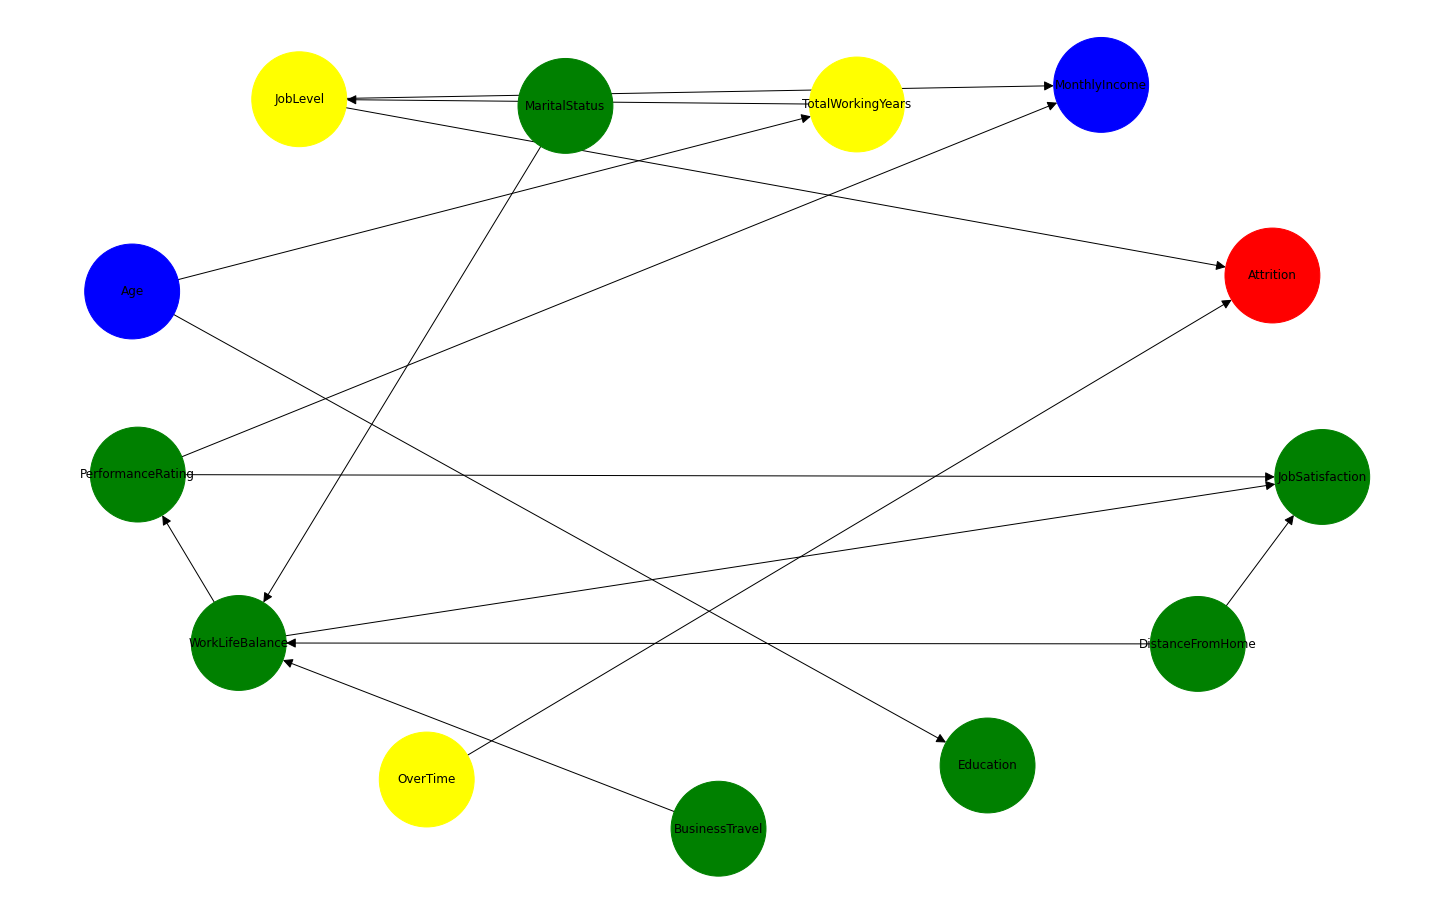

In [25]:
draw_indipendence(bn_likelihood,'Age','MonthlyIncome',evidence = ['Attrition'])

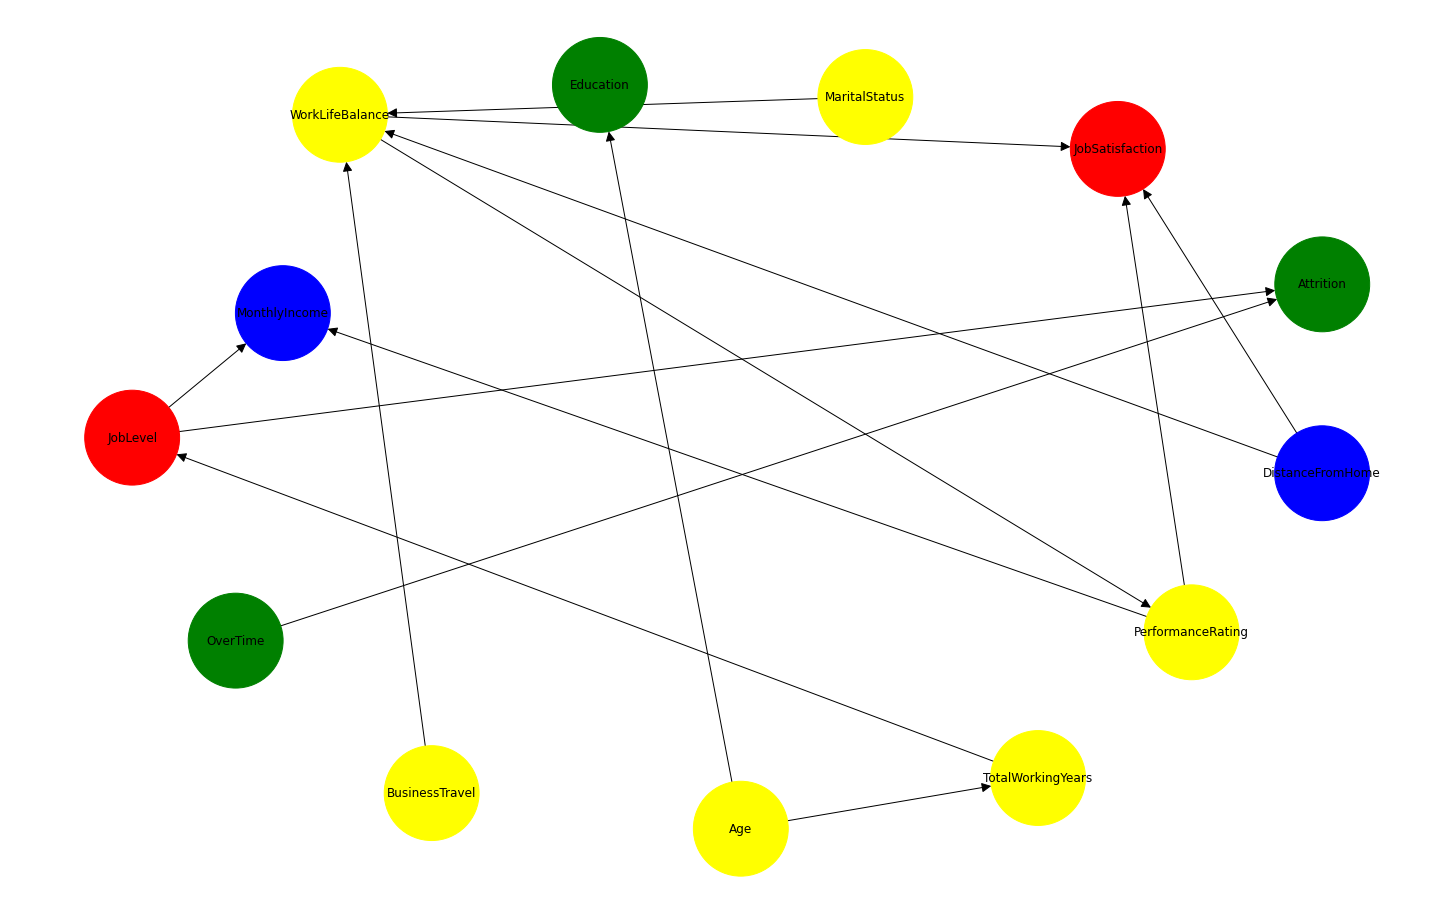

In [31]:
draw_indipendence(bn_likelihood,'MonthlyIncome','DistanceFromHome',evidence = ['JobSatisfaction','JobLevel'])

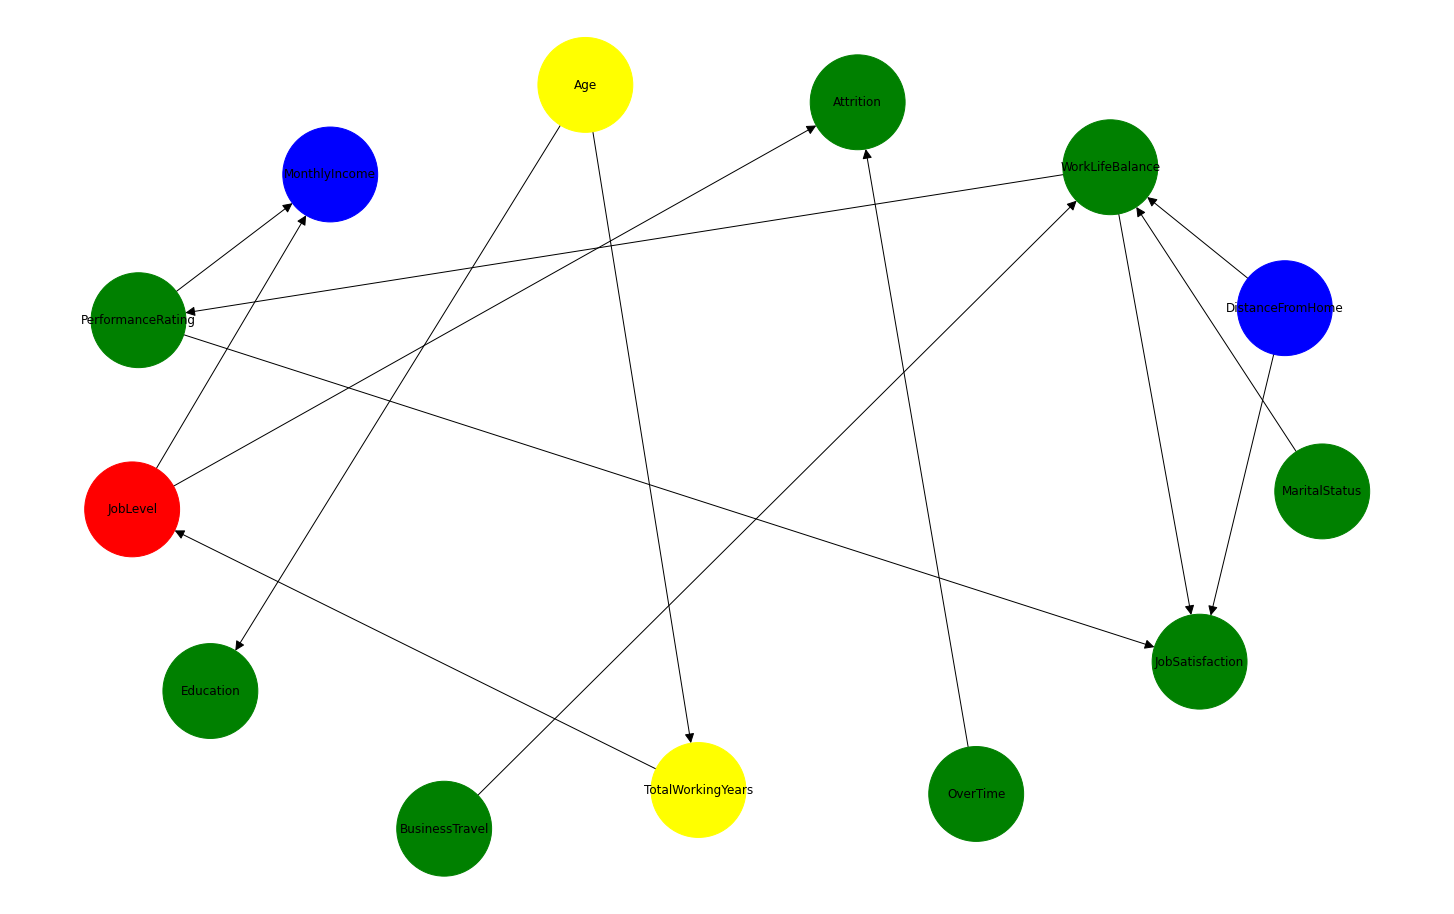

In [32]:
draw_indipendence(bn_likelihood,'MonthlyIncome','DistanceFromHome',evidence = ['JobLevel'])

# Inference

## likelihood
abbiamo una stima corretta visto che un giovane non potrà mai essere un esperto

In [36]:
infer = VariableElimination(bn_likelihood)
print(infer.query(['TotalWorkingYears'], evidence={'Age':'Young'}))

+-------------------------------+--------------------------+
| TotalWorkingYears             |   phi(TotalWorkingYears) |
+===============================+==========================+
| TotalWorkingYears(Beginner)   |                   0.4724 |
+-------------------------------+--------------------------+
| TotalWorkingYears(Competent)  |                   0.2730 |
+-------------------------------+--------------------------+
| TotalWorkingYears(Expert)     |                   0.0000 |
+-------------------------------+--------------------------+
| TotalWorkingYears(Novice)     |                   0.2546 |
+-------------------------------+--------------------------+
| TotalWorkingYears(Proficient) |                   0.0000 |
+-------------------------------+--------------------------+


E' normale cge se sei di livello 2 la probabilità di avere uno stipedio alto e basso sia al di sotto della media
Al contrario è normale che se sei un manager la probabilità di avere uno stipedio alto è pari a 1

In [39]:
print(infer.query(['MonthlyIncome'], evidence={'JobLevel':'Rappresentative'}))

+---------------------------+----------------------+
| MonthlyIncome             |   phi(MonthlyIncome) |
+===========================+======================+
| MonthlyIncome(Higher)     |               0.1853 |
+---------------------------+----------------------+
| MonthlyIncome(Lower)      |               0.0450 |
+---------------------------+----------------------+
| MonthlyIncome(On_average) |               0.7697 |
+---------------------------+----------------------+
+---------------------------+----------------------+
| MonthlyIncome             |   phi(MonthlyIncome) |
+===========================+======================+
| MonthlyIncome(Higher)     |               1.0000 |
+---------------------------+----------------------+
| MonthlyIncome(Lower)      |               0.0000 |
+---------------------------+----------------------+
| MonthlyIncome(On_average) |               0.0000 |
+---------------------------+----------------------+


In [41]:
print(infer.query(['MonthlyIncome'], evidence={'PerformanceRating':'Excellent','OverTime': 'Yes'}))
print(infer.query(['Attrition'], evidence={'PerformanceRating':'Excellent','OverTime': 'Yes'}))

+---------------------------+----------------------+
| MonthlyIncome             |   phi(MonthlyIncome) |
+===========================+======================+
| MonthlyIncome(Higher)     |               0.3346 |
+---------------------------+----------------------+
| MonthlyIncome(Lower)      |               0.3294 |
+---------------------------+----------------------+
| MonthlyIncome(On_average) |               0.3361 |
+---------------------------+----------------------+
+----------------+------------------+
| Attrition      |   phi(Attrition) |
+================+==================+
| Attrition(No)  |           0.6965 |
+----------------+------------------+
| Attrition(Yes) |           0.3035 |
+----------------+------------------+
